![](../img/330-banner.png)

# Lecture 1: Course Introduction 

UBC 2025-26

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), "code"))
from IPython.display import HTML, display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)
os.environ['OMP_NUM_THREADS'] = '1'

DATA_DIR = '../data/' 

## Learning outcomes 
From this lecture, you will be able to 

- Explain the motivation behind study machine learning. 
- Briefly describe supervised learning.
- Differentiate between traditional programming and machine learning.
- Assess whether a given problem is suitable for a machine learning solution.

<br><br>

## Characters in this course? 

- CPSC 330 teaching team (instructors and the TAs)
- Eva (a fictitious enthusiastic student)
- And you all, of course 🙂! 

### Meet Eva (a fictitious persona)!

![](../img/eva-hi.png)

Eva is among one of you. She has some experience in Python programming. She knows machine learning as a buzz word. During her recent internship, she has developed some interest and curiosity in the field. She wants to learn what is it and how to use it. She is a curious person and usually has a lot of questions!  

## Why machine learning (ML)? [[video](https://www.youtube.com/watch?v=-1hTcS5ZE4w&t=1s)]

Check out [the accompanying video](https://www.youtube.com/watch?v=-1hTcS5ZE4w&t=1s) on this material. 

### Prevalence of ML

Let's look at some examples. 

<img src="../img/ml-examples.png" width="1000">
<!-- ![](../img/ml-examples.png) -->


- Image sources 
    - [Voice assistants](https://geeksfl.com/blog/best-voice-assistant/)
    - [Google News](https://news.google.com)    
    - [Recommendation systems](https://en.wikipedia.org/wiki/Recommender_system)
    - [Face Recognition source](https://startupleague.online/blog/3dss-tech-facial-recognition-technology/)
    - [Auto-completion](https://9to5google.com/2020/08/10/android-11-autofill-keyboard/)
    - [Stock market prediction](https://hbr.org/2019/12/what-machine-learning-will-mean-for-asset-managers)    
    - [Character recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)    
    - [AlphaGo](https://deepmind.com/alphago-china)
    - [Self-driving cars](https://mc.ai/artificial-intelligence-in-self-driving-cars%E2%80%8A-%E2%80%8Ahow-far-have-we-gotten/)
    - [Drug discovery](https://www.nature.com/articles/d41586-018-05267-x)
    - [Cancer detection](https://venturebeat.com/2018/10/12/google-ai-claims-99-accuracy-in-metastatic-breast-cancer-detection/)

### Saving time and scaling products 

- Imagine writing a program for **spam identification**, i.e., whether an email is spam or non-spam. 
- *Traditional programming*
    - Come up with **rules** using human understanding of spam messages. 
    - Time consuming and hard to come up with robust set of rules. 
- *Machine learning*
    - Collect large amount of **data of spam and non-spam** emails and let the machine learning algorithm figure out rules. 
- With machine learning, you're likely to 
    - **Save time**
    - Customize and **scale** products 

## What are AI, ML, and DL?

Before we dive in, let's clear up the difference between these buzzwords you've probably heard: AI, ML, and DL. 

- **Artificial Intelligence (AI)**: Broad goal of making computers perform tasks that typically require human intelligence (e.g., chess-playing programs, virtual assistants)
  
- **Machine Learning (ML)**: A subset of AI where systems learn patterns from data instead of being explicitly programmed (e.g., spam filtering, predicting housing prices)

- **Deep Learning (DL)**: A subset of ML that uses multi-layered neural networks to learn complex patterns (e.g., image classification, speech-to-text)
  
<!-- ![](../img/ai-ml-dl.png) -->
<img src="../img/ai-ml-dl.png" width="600">

In this course, we'll focus on machine learning, the practical, everyday workhorse of AI. Toward the end, you'll also get a high-level overview of deep learning, the driver behind recent breakthroughs in generative AI.

<br><br>

## Supervised machine learning 

### Types of machine learning

Here are some typical learning problems. 

- **Supervised learning** ([Gmail spam filtering](https://support.google.com/a/answer/2368132?hl=en))
    - Training a model from **input data and its corresponding targets** to predict targets for **new examples**.     
- Unsupervised learning ([Google News](https://news.google.com/))
    - Training a model to find patterns in a dataset, typically an **unlabeled dataset**.
- Reinforcement learning ([AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far))
    - A family of algorithms for finding suitable **actions** to take in a given situation in order to **maximize a reward**.
- Recommendation systems ([Amazon item recommendation system](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf))
    - Predict the "**rating**" or "**preference**" a user would give to an item.    

### What is supervised machine learning (ML)? 

- Training data comprises a set of observations ($X$) and their corresponding targets ($y$). 
- We wish to find a model function $f$ that relates $X$ to $y$.
- We use the model function to predict targets of new examples. 

<!-- ![](../img/sup-learning.png) -->
<img src="../img/sup-learning.png" width="600"> 


### Example: Predict whether a message is spam or not 

#### Input: features $X$ and target $y$

> Do not worry about the code and syntax for now.

> Download SMS Spam Collection Dataset from [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

#### Training a supervised machine learning model with $X$ and $y$

In [2]:
sms_df = pd.read_csv(DATA_DIR + "spam.csv", encoding="latin-1")
sms_df = sms_df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})
train_df, test_df = train_test_split(sms_df, test_size=0.10, random_state=42)
HTML(train_df.head().to_html(index=False))

target,sms
spam,"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."
ham,"Aight, I'll hit you up when I get some cash"
ham,Don no da:)whats you plan?
ham,Going to take your babe out ?
ham,No need lar. Jus testing e phone card. Dunno network not gd i thk. Me waiting 4 my sis 2 finish bathing so i can bathe. Dun disturb u liao u cleaning ur room.


In [3]:
X_train, y_train = train_df["sms"], train_df["target"]
X_test, y_test = test_df["sms"], test_df["target"]
clf = make_pipeline(CountVectorizer(max_features=5000), LogisticRegression(max_iter=5000))
clf.fit(X_train, y_train);

#### Predicting on unseen data using the trained model

In [4]:
pd.DataFrame(X_test[0:4])

,sms
3245,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one m..."
1044,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.


In [5]:
pred_dict = {
    "sms": X_test[0:4],
    "spam_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

,sms,spam_predictions
3245,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens",ham
944,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones",ham
1044,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p",spam
2484,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.,ham


**We have accurately predicted labels for the unseen text messages above!**

Question: how many examples do you think were needed to get this result? In other words, how many samples are in `train_df`?

**First iClicker! (just a test)**

Connect to iClicker Cloud through Canvas. You will need to create an iClicker account if you don't already have one, in which case you may not be able to participate today - but that's ok, this is just a test.

- (A) < 10 
- (B) 10 - 100
- (C) 100 - 1000
- (D) 1000 - 10000 
- (E) 10000 - 100000

In [6]:
# Ready to find out?

len(train_df)

5014

<br><br>

### (Supervised) machine learning: popular definition 
<blockquote>
A field of study that gives computers the ability to learn without being explicitly programmed. <br> -- Arthur Samuel (1959)
</blockquote>

ML is a different way to think about problem solving.

<!-- ![](../img/traditional-programming-vs-ML.png) -->
<img src="../img/traditional-programming-vs-ML.png" width="600"> 

### Examples

Let's look at some concrete examples of supervised machine learning. 

> Do not worry about the code at this point. Just focus on the input and output in each example.

#### Example 1: Predicting whether a patient has a liver disease or not

##### Input data

Suppose we are interested in predicting whether a patient has the disease or not. We are given some tabular data with inputs and outputs of liver patients, as shown below. The data contains a number of input features and a special column called "Target" which is the output we are interested in predicting. 

Download the data from [here](https://www.kaggle.com/uciml/indian-liver-patient-records). 

In [7]:
df = pd.read_csv(DATA_DIR + "indian_liver_patient.csv")
df = df.drop(columns = ["Gender"])
df["Dataset"] = df["Dataset"].replace(1, "Disease")
df["Dataset"] = df["Dataset"].replace(2, "No Disease")
df.rename(columns={"Dataset": "Target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=4, random_state=42)
HTML(train_df.head().to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
40,14.5,6.4,358,50,75,5.7,2.1,0.50,Disease
33,0.7,0.2,256,21,30,8.5,3.9,0.80,Disease
24,0.7,0.2,188,11,10,5.5,2.3,0.71,No Disease
60,0.7,0.2,171,31,26,7.0,3.5,1.00,No Disease
18,0.8,0.2,199,34,31,6.5,3.5,1.16,No Disease


##### Building a supervise machine learning model

Let's train a supervised machine learning model with the input and output above. 

In [8]:
from lightgbm.sklearn import LGBMClassifier

X_train = train_df.drop(columns=["Target"])
y_train = train_df["Target"]
X_test = test_df.drop(columns=["Target"])
y_test = test_df["Target"]
model = LGBMClassifier(random_state=123, verbose=-1)
model.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


##### Model predictions on unseen data

- Given features of new patients below we'll use this model to predict whether these patients have the liver disease or not. 

In [9]:
HTML(X_test.reset_index(drop=True).to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
19,1.4,0.8,178,13,26,8.0,4.6,1.30
12,1.0,0.2,719,157,108,7.2,3.7,1.00
60,5.7,2.8,214,412,850,7.3,3.2,0.78
42,0.5,0.1,162,155,108,8.1,4.0,0.90


In [10]:
pred_df = pd.DataFrame({"Predicted_target": model.predict(X_test).tolist()})

df_concat = pd.concat([pred_df, X_test.reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

Predicted_target,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
No Disease,19,1.4,0.8,178,13,26,8.0,4.6,1.30
Disease,12,1.0,0.2,719,157,108,7.2,3.7,1.00
Disease,60,5.7,2.8,214,412,850,7.3,3.2,0.78
Disease,42,0.5,0.1,162,155,108,8.1,4.0,0.90


<br><br>

#### Example 2: Predicting the label of a given image 

Suppose you want to predict the label of a given image using supervised machine learning. We are using a pre-trained model here to predict labels of new unseen images. 

___
Assuming that you have successfully created cpsc330 `conda` environment on your computer, you'll have to install `torchvision` in cpsc330 `conda` environment to run the following code. If you are unable to install `torchvision` on your laptop, please don't worry at this point. It's not crucial at this point. 

`conda activate cpsc330` <br>
`conda install -c pytorch torchvision`

or just

`conda install -n cpsc330 -c pytorch torchvision`
___

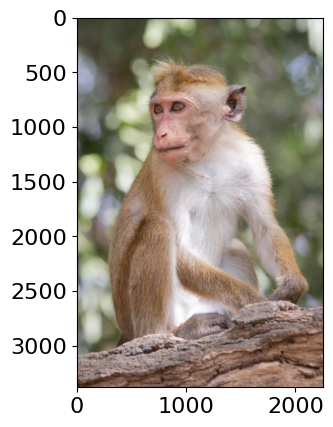

                                   Class  Probability score
                                 macaque              0.885
patas, hussar monkey, Erythrocebus patas              0.062
      proboscis monkey, Nasalis larvatus              0.015
                       titi, titi monkey              0.010
--------------------------------------------------------------


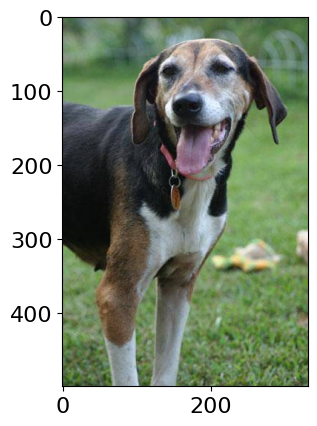

                        Class  Probability score
Walker hound, Walker foxhound              0.582
             English foxhound              0.144
                       beagle              0.068
                  EntleBucher              0.059
--------------------------------------------------------------


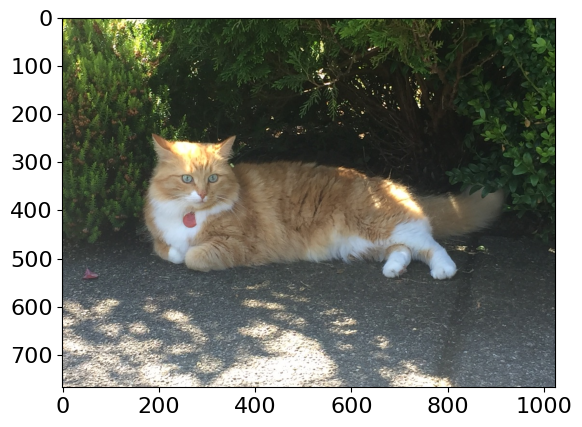

                         Class  Probability score
                     tiger cat              0.636
              tabby, tabby cat              0.174
Pembroke, Pembroke Welsh corgi              0.081
               lynx, catamount              0.011
--------------------------------------------------------------


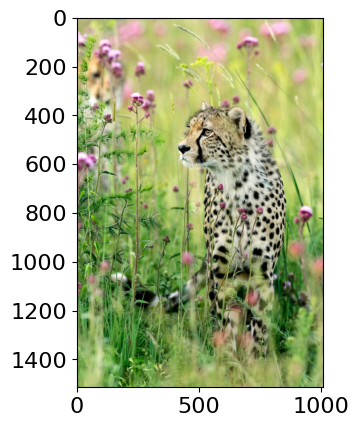

                                     Class  Probability score
         cheetah, chetah, Acinonyx jubatus              0.994
                  leopard, Panthera pardus              0.005
jaguar, panther, Panthera onca, Felis onca              0.001
       snow leopard, ounce, Panthera uncia              0.000
--------------------------------------------------------------


In [11]:
import img_classify
from PIL import Image
import glob
import matplotlib.pyplot as plt
# Predict topn labels and their associated probabilities for unseen images
images = glob.glob(DATA_DIR + "test_images/*.*")
class_labels_file = DATA_DIR + 'imagenet_classes.txt'
%matplotlib inline 
for img_path in images:
    img = Image.open(img_path).convert('RGB')
    img.load()
    plt.imshow(img)
    plt.show();    
    df = img_classify.classify_image(img_path, class_labels_file)
    print(df.to_string(index=False))
    print("--------------------------------------------------------------")

<br><br>

#### Example 3: Predicting sentiment expressed in a movie review

Suppose you are interested in predicting whether a given movie review is positive or negative. You can do it using **supervised machine learning**. 

Download the data from [here](https://www.kaggle.com/utathya/imdb-review-dataset). 

Note: the textbook uses a very similar dataset for this example (https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), but be aware that the columns have different names.

In [12]:
imdb_df = pd.read_csv("../data/imdb_master.csv", encoding="ISO-8859-1")
imdb_df = imdb_df[imdb_df["sentiment"].str.startswith(("pos", "neg"))]
# imdb_df.drop(["Unnamed: 0", "type", "file"], axis=1, inplace=True)
imdb_df.rename(columns={"sentiment": "target"}, inplace=True)
train_df, test_df = train_test_split(imdb_df, test_size=0.10, random_state=123)
HTML(train_df.head().to_html(index=False))

review,target
"Often tagged as a comedy, The Man In The White Suit is laying out far more than a chuckle here and there.<br /><br />Sidney Stratton is an eccentric inventor who isn't getting the chances to flourish his inventions on the world because nobody pays him notice, he merely is the odd ball odd job man about the place as it were. After bluffing his way into Birnley's textile mill, he uses their laboratory to achieve his goal of inventing a fabric that not only never wears out, but also never needs to be cleaned!. He is at first proclaimed a genius and those who ignored him at first suddenly want a big piece of him, but then the doom portents of an industry going bust rears its head and acclaim quickly turns to something far more scary.<br /><br />Yes the film is very funny, in fact some scenes are dam hilarious, but it's the satirical edge to the film that lifts it way above the ordinary to me. The contradictions about the advent of technology is a crucial theme here, do we want inventions that save us fortunes whilst closing down industries ?, you only have to see what happened to the coal industry in Britain to know what I'm on about. The decade the film was made is a crucial point to note, the making of nuclear weapons became more than just hearsay, science was advancing to frighteningly new proportions. You watch this film and see the quick turnaround of events for the main protagonist Stanley, from hero to enemy in one foul swoop, a victim of his own pursuit to better mankind !, it's so dark the film should of been called The Man In The Black Suit.<br /><br />I honestly can't find anything wrong in this film, the script from Roger MacDougall, John Dighton, and director Alex Mackendrick could be filmed today and it wouldn't be out of place such is the sharpness and thought of mind it has. The sound and setting is tremendous, the direction is seamless, with the tonal shift adroitly handled by Mackendrick. Some of the scenes are just wonderful, one in particular tugs on the heart strings and brings one to think of a certain scene in David Lynch's Elephant Man some 29 years later, and yet after such a downturn of events the film still manages to take a wink as the genius that is Alec Guinness gets to close out the film to keep the viewers pondering not only the future of Stanley, but also the rest of us in this rapidly advancing world.<br /><br />A timeless masterpiece, thematically and as a piece of art, 10/10.",positive
"Dirty Harry goes to Atlanta is what Burt called this fantastic, first-rate detective thriller that borrows some of its plot from the venerable Dana Andrews movie ""Laura."" Not only does Burt Reynolds star in this superb saga but he also helmed it and he doesn't make a single mistake either staging the action or with his casting of characters. Not a bad performance in the movie and Reynolds does an outstanding job of directing it. Henry Silva is truly icy as a hit-man.<br /><br />Detective Tom Sharky (Burt Reynolds) is on a narcotics case in underground Atlanta when everything goes wrong. He winds up chasing a suspect and shooting it out with the gunman on a bus. During the melee, an innocent bystander dies. John Woo's ""The Killer"" replicates this scene. Anyway, the Atlanta Police Department busts Burt down to Vice and he takes orders from a new boss, Frisco (Charles Durning of ""Oh, Brother, Where Art Thou?"") in the basement. Sharky winds up in a real cesspool of crime. Sharky and his fellow detectives Arch (Bernie Casey) and Papa (Brian Keith) set up surveillance on a high-priced call girl Dominoe (Rachel Ward of ""After Dark, My Sweet"")who has a luxurious apartment that she shares with another girl.<br /><br />Dominoe is seeing a local politician Hotchkins (Earl Holliman of ""Police Woman"") on the side who is campaigning for governor but the chief villain, Victor (Vittorio Gassman of ""The Dirty Game"") wants him to end the affair. Hotchkins is reluctant to accommodate Victor, so Victor has

In [13]:
# Build an ML model
X_train, y_train = train_df["review"], train_df["target"]
X_test, y_test = test_df["review"], test_df["target"]

clf = make_pipeline(CountVectorizer(max_features=5000), LogisticRegression(max_iter=5000))
clf.fit(X_train, y_train);

In [14]:
# Predict on unseen data using the built model
pred_dict = {
    "reviews": X_test[0:4],
    "sentiment_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

<br><br>

#### Example 4: Predicting housing prices

Suppose we want to predict housing prices given a number of attributes associated with houses. 

Download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [15]:
df = pd.read_csv( DATA_DIR + "kc_house_data.csv")
df = df.drop(columns = ["id", "date"])
df.rename(columns={"price": "target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4)
HTML(train_df.head().to_html(index=False))

target,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
509000.0,2,1.50,1930,3521,2.0,0,0,3,8,1930,0,1989,0,98007,47.6092,-122.146,1840,3576
675000.0,5,2.75,2570,12906,2.0,0,0,3,8,2570,0,1987,0,98075,47.5814,-122.050,2580,12927
420000.0,3,1.00,1150,5120,1.0,0,0,4,6,800,350,1946,0,98116,47.5588,-122.392,1220,5120
680000.0,8,2.75,2530,4800,2.0,0,0,4,7,1390,1140,1901,0,98112,47.6241,-122.305,1540,4800
357823.0,3,1.50,1240,9196,1.0,0,0,3,8,1240,0,1968,0,98072,47.7562,-122.094,1690,10800


In [16]:
# Build a regression model
from lightgbm.sklearn import LGBMRegressor

X_train, y_train = train_df.drop(columns= ["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns= ["target"]), train_df["target"]

model = LGBMRegressor()
#model = XGBRegressor()
model.fit(X_train, y_train);

In [17]:
# Predict on unseen examples using the built model
pred_df = pd.DataFrame(
    # {"Predicted target": model.predict(X_test[0:4]).tolist(), "Actual price": y_test[0:4].tolist()}
    {"Predicted_target": model.predict(X_test[0:4]).tolist()}
)
df_concat = pd.concat([pred_df, X_test[0:4].reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

Predicted_target,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
345831.740542,4,2.25,2130,8078,1.0,0,0,4,7,1380,750,1977,0,98055,47.4482,-122.209,2300,8112
601042.018745,3,2.50,2210,7620,2.0,0,0,3,8,2210,0,1994,0,98052,47.6938,-122.130,1920,7440
311310.186024,4,1.50,1800,9576,1.0,0,0,4,7,1800,0,1977,0,98045,47.4664,-121.747,1370,9576
597555.592401,3,2.50,1580,1321,2.0,0,2,3,8,1080,500,2014,0,98107,47.6688,-122.402,1530,1357


<br>
To **summarize**, supervised machine learning can be applied to **many problems and types of data**, but remember that it’s **not always** the right tool.

- Use machine learning when you have a **large, complex dataset** and the **decision rules are unknown**, fuzzy, or too complicated to define explicitly.

- Pause before jumping in: ML is exciting, but always ask whether you really need it for your problem.

- Use **rule-based systems when the logic is clear**, deterministic, and based on stable rules or thresholds.

- **Rely on human expertise** when problems involve ethics, creativity, emotion, or ambiguity that cannot be formalized easily.

<br><br>

### 🤔 Eva's questions

At this point, Eva is wondering about many questions. 

- How are we exactly "learning" whether a message is spam and ham? 
- What do you mean by "learn without being explicitly programmed"? The code has to be somewhere ... 
- Are we expected to get correct predictions for all possible messages? How does it predict the label for a message it has not seen before?  
- What if the model mis-labels an unseen example? For instance, what if the model incorrectly predicts a non-spam as a spam? What would be the consequences? 
- How do we measure the success or failure of spam identification? 
- If you want to use this model in the wild, how do you know how reliable it is?  
- Would it be useful to know how confident the model is about the predictions rather than just a yes or a no?

It's great to think about these questions right now. But Eva has to be patient. By the end of this course you'll know answers to many of these questions!  

![](../img/eva-qm.png)

### Machine learning workflow 

Supervised machine learning is quite flexible; it can be used on a variety of problems and different kinds of data. Here is a typical workflow of a supervised machine learning systems.  

<!-- ![](../img/ml-workflow.png) -->
<img src="../img/ml-workflow.png" width="600">

We will build machine learning pipelines in this course, focusing on some of the steps above. 

<br><br>

### ❓❓ Questions for you

### Select all of the following statements which are **True** (iClicker)

- (A) Checking if a UBC email address ends with @student.ubc.ca before allowing login

- (B) Deciding which students should be awarded a scholarship based on their personal essays

- (C) Predicting which songs you’ll like based on your Spotify listening history

- (D) Detecting plagiarism by checking if two essays are exactly identical

- (E) Automatically tagging photos of your friends on Instagram
<br><br><br><br>

## Break (5 min)

![](../img/eva-coffee.png)

- We will try to take a 5-minute break half way through every class.

<br><br>

## About this course

### Course website 

[https://github.com/UBC-CS/cpsc330-2025W2](https://github.com/UBC-CS/cpsc330-2025W2) is the most important link. Please read everything on there!


### CPSC 330 vs. 340

Read [https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/330_vs_340.md](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/330_vs_340.md)
which explains the difference between the two courses.  

**TLDR:**

- 340: how do ML models work?
- 330: how do I use ML models?
- CPSC 340 has many prerequisites. 
- CPSC 340 goes deeper but has a more narrow scope.
- I think CPSC 330 will be more useful if you just plan to apply basic ML.

### Registration, waitlist and prerequisites

Please go through [the syllabus](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/syllabus.md) carefully before contacting me about these issues. Even then, I am very unlikely to be able to help with registration, waitlist or prerequisite issues.

CPSC 330 is a very fast-paced course and students who register in the course late have a tendency to struggle greatly and are rarely able to catch-up. In 2025W2, we are expecting that all students who are registered on any open waitlists by 3 PM on January 9th will have an opportunity to take the course. This also means that **the registration into the course will be closed by the end of the day on January 9th, and no further registrations will be permitted.** Of course, students will still be able to drop the course until UBC's official Add/Drop date. We hope this will allow all students to have the best chance at success in this course!

**The instructors have no control over the wailtist order and cannot help you bypass the waiting list.**

### Course format

- Often, there will be videos to watch before or during the lecture time. (Check the main course page to see if you are expected to watch videos before the class.)
- Tutorials for this course will be conducted by TAs, who will guide you through additional exercises and demos on the content covered each week. **A bonus of up to 2% will be added to your final grade for attending tutorials.**
- We'll have two midterms and one final ([dates](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/syllabus.md)).

### Communications

- Our main forum for getting help will be Ed Discussions --> access through Canvas.
- Other forms of communications (Canvas, email...) will likely go unresponded. 
- Let's all take 2 minutes to register (through tab on Canvas)
- You must have a @ubc.ca email associated with your account. Unrecognizable accounts (other emails) will be dropped without warning.

### Grades

- The grading breakdown is in the [syllabus](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/syllabus.md), as well as instructions on how to use **late tokens**. [This page](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/grades.md) explains the policy on challenging grades.
- You have one week to raise a concern from the time that your assignment grades were posted (through Gradescope).
- Unreasonable regrade requests subtract time to more important activities for this course. The first unreasonable request will receive a warning. The second will result in the future inability to challenge grades. Examples include:
    - Debating 1 point differences for similar answers
    - Arguing the weight of the rubric items
    - Resubmitting a request that was already answered

### First deliverables

- First homework assignment is due **this coming Monday**, January 12th, at 11:59pm. The assignment is available on GitHub.
- You must do the first homework assignment on your own.
- Assignments are submitted on Gradescope (see [instructions](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/homework_instructions.md)). Let's all do the first access together through Canvas.
- The [Syllabus quiz](https://us.prairielearn.com/pl/course_instance/202573/assessment/2628896) is available on PrairieLearn and is also due on January 12th, at 11:59pm.

Please read [this entire document about asking for help](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/asking_for_help.md).
**TLDR:** Be nice.

### Let's talk about [GenAI](https://docs.google.com/presentation/d/1Efkhe0irFb_PnLVEgQoA-jWy4c2GI0mM3foZ1T5EhT8/edit?usp=sharing)



### Lecture and homework format: Jupyter notebooks

- This document is a [Jupyter notebook](https://jupyter.org/), with file extension `.ipynb`.
- Confusingly, "Jupyter notebook" is also the original application that opens `.ipynb` files - but has since been replaced by **Jupyter lab**.
  - Some things might not work with the Jupyter notebook application.
  - The course setup/install instructions include Jupyter lab.
- Jupyter notebooks contain a mix of code, code output, markdown-formatted text (including LaTeX equations), and more.
  - When you open a Jupyter notebook in one of these apps, the document is "live", meaning you can run the code.
  - For example:

In [18]:
1+1

2

In [19]:
x = [1,2,3]
x[0] = 9999
x

[9999, 2, 3]

- By default, Jupyter prints out the result of the last line of code, so you don't need as many `print` statements.
- In addition to the "live" notebooks, Jupyter notebooks can be statically rendered in the web browser, e.g. [this](https://github.com/UBC-CS/cpsc330-2025W1/blob/main/lectures/101-Giulia-lectures/01_intro.ipynb).
  - This can be convenient for quick read-only access, without needing to launch the Jupyter notebook/lab application.
  - But you need to launch the app properly to interact with the notebooks.



### Lecture style

- Lots of code snippets in Jupyter.
- There will be some [YouTube videos](https://www.youtube.com/channel/UC40oUwJPrUmhsYdURk8OjqA) to watch before or during the lecture. 
- We will also try to work on some questions and exercises together during the class. 
- All materials will be posted on the course website. Lecture notes will be posted right before each class.
- Lectures from the previous semester are available on previous course repositories (change 2025W1 with 2024W2, for example). 
- I cannot promise anything will stay the same from last year to this year, so watch out for differences.

<br><br>

## Setting up your computer for the course 

### Recommended browser

- I'll test the course notebooks and exams, which we'll be doing via [Canvas](https://canvas.ubc.ca/courses/106375), on the following two browsers: Chrome and Firefox. So I recommend that you use one of these browsers for the course.

- You can install Chrome [here](https://www.google.com/chrome/). 
- You can install Firefox [here](https://www.mozilla.org/en-US/firefox/new/). 

### Python requirements/resources

We will primarily use Python in this course.

Here is the basic Python knowledge you'll need for the course: 

- Basic Python programming
- Numpy
- Pandas
- Basic matplotlib
- Sparse matrices

Some of you will already know Python, others won't. Homework 1 is all about Python.


___
**We do not have time to teach all the Python we need** 
but you can find some useful Python resources [here](https://github.com/UBC-CS/cpsc330-2025W2/blob/master/docs/resources.md).
___

### Activity

In this course, we will primarily be using Python, git, GitHub, Canvas, Gradescope, and Piazza. Let's set up your computers for the course. 

- Follow the setup instructions [here](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/setup.md) to create a course conda environment on your computer. 

### Checklist for you before next class 

- [ ] Are you able to access course [Canvas](https://canvas.ubc.ca/courses/178047) shell? 
- [ ] Are you able to access Gradescope (through Canvas)? If not, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).
- [ ] Are you able to access iClicker (through Canvas)?
- [ ] Are you able to access Ed Discussions (through Canvas)?
- [ ] Did you follow the setup instructions [here](https://github.com/UBC-CS/cpsc330-2025W2/blob/main/docs/setup.md) to create a course conda environment on your computer? 
- [ ] Did you complete the Syllabus quiz on PrairieLearn (through Canvas)? (Due date: Monday, Jan 12th at 11:59pm)
- [ ] Are you done with homework 1? (Due: Monday, Jan 12th at 11:59pm)

<br><br>

## Summary

- Machine learning is increasingly being applied across various fields.
- In supervised learning, we are given a set of observations ($X$) and their corresponding targets ($y$) and we wish to find a model function $f$ that relates $X$ to $y$.
- Machine learning is a different paradigm for problem solving. Very often it reduces the time you spend programming and helps customizing and scaling your products.
- Before applying machine learning to a problem, it's always advisable to assess whether a given problem is suitable for a machine learning solution or not.

![](../img/eva-seeyou.png)